# **Predicting Happiness**

In this problem set you will work with a data set from the [World Happiness Website](https://worldhappiness.report/ed/2018/).

You will use the data in the file,  WHR2018Chapter2OnlineData.xls.

Our goal will be to develop a model for happiness.


# [DSLC Stage 1]: Domain Problem and Data Collection

Read the description of the data at the World Happiness Website.

**TODO: Add a text cell to answer the following questions:**

1. From your new domain knowledge, what variable will you use as a response or dependent variable for your model of happiness?
2. From your new domain knowledge, what variables will you consider as potential predictor (or independent) variables?
3. From your new domain knowledge, can you identify any variables that are cofounders?
4. Please share one question that you still have about the data collection process.


#### 1. Response (Dependent) Variable:
The dependent variable for the model will be “Life Ladder”, which represents the self-reported happiness or life satisfaction score for each country and year. It serves as a measure of how happy people perceive themselves to be.

#### 2. Predictor (Independent) Variables:
Based on the World Happiness Report’s documentation and the dataset columns, the following variables will be considered as potential predictors:

- Log GDP per capita – economic prosperity and standard of living.

- Social support – the perceived availability of help from family or friends.

- Healthy life expectancy at birth – overall physical well-being.

- Freedom to make life choices – autonomy in personal and political decisions.

- Generosity – the tendency to give or help others.

- Perceptions of corruption – institutional trust and integrity.

- Positive affect and Negative affect – emotional well-being indicators.

- Confidence in national government, Democratic Quality, and Delivery Quality – measures of governance and political stability.

#### 3. Potential Confounding Variables:

- GDP per capita may confound relationships with health, social support, and freedom, since wealthier countries often perform better across all these dimensions.

- Perceptions of corruption, Confidence in national government, and Democratic Quality could also be correlated, influencing both happiness and each other.

- Regional or cultural differences (not explicitly represented in the dataset) could act as hidden confounders affecting self-reported happiness.

#### 4. Question About Data Collection:
How consistent are the survey methods across countries — for example, were all responses collected using the same language translations, question phrasing, and sampling procedures to ensure comparability across cultural contexts?

# [DSLC stage 2]: Data cleaning, pre-processing, and exploratory data analysis


In this section you will load and clean the data. Please run the code provide and complete modifications as specified.


In [164]:
# Installing scikit-lego package
%pip install scikit-lego

Note: you may need to restart the kernel to use updated packages.


In [165]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [168]:
# load the happiness data in file WHR2018Chapter2OnlineData.xls
# Upload this file using the folder to left
happiness_orig = pd.read_excel("WHR2018Chapter2OnlineData.xls", sheet_name=0)
happiness_orig

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


In [170]:
# Examine the first 10 rows
happiness_orig.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [172]:
#TODO Add code to examine a random sample of 10 rows
happiness_orig.sample(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
549,Haiti,2016,3.352300,7.410929,0.583742,53.097378,0.303540,0.294325,0.838523,0.552774,0.367341,0.146065,-0.702021,-1.410874,2.188144,0.652729,NaN,0.409000,0.613710
14,Albania,2012,5.510124,9.246649,0.784502,68.028885,0.601512,-0.174559,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.290,0.303250,0.568153
840,Madagascar,2016,3.663086,7.241846,0.746497,56.645138,0.569645,-0.061460,0.864171,0.813191,0.204255,0.490199,-0.333082,-0.873781,1.532529,0.418371,NaN,0.431000,0.479676
628,Iraq,2013,4.725017,9.621003,0.728285,60.298901,NaN,-0.089312,0.709726,NaN,0.554279,0.500670,-1.534291,-1.265547,3.006974,0.636394,NaN,0.290500,0.447405
1384,Togo,2006,3.202429,7.086521,0.435414,47.433723,0.628228,-0.006863,0.849972,0.614520,0.348205,0.319889,-0.862058,-1.098394,1.733302,0.541246,0.422,0.437333,NaN
330,Costa Rica,2015,6.854004,9.610069,0.878273,69.531830,0.906926,-0.060608,0.761419,0.849710,0.286440,0.261169,0.916763,0.538676,2.263607,0.330260,0.482,0.491312,0.477598
1216,Sierra Leone,2017,4.089562,7.253018,0.652287,44.386528,0.710614,0.089226,0.848398,0.600368,0.495040,0.737517,NaN,NaN,2.595259,0.634606,NaN,0.371000,0.583586
1203,Serbia,2014,5.112729,9.481345,0.782709,65.291710,0.531597,0.068065,0.911732,0.497755,0.326118,0.447972,0.198361,-0.036461,2.200608,0.430418,NaN,0.305900,0.373830
1151,Romania,2017,6.089905,10.028892,0.811240,66.857086,0.838587,-0.164421,0.925658,0.733730,0.230836,0.298341,NaN,NaN,2.141298,0.351614,NaN,0.290929,0.412118
915,Moldova,2012,5.995713,8.330985,0.826220,62.537098,0.602419,-0.001564,0.955485,0.567697,0.313726,0.214622,0.006032,-0.402288,1.904994,0.317726,0.292,0.329937,0.375586


#### 5. Please share one question that you still have about the data itself
How were variables such as “Generosity” and “Perceptions of corruption” quantified and standardized across countries?
Since these are subjective indicators collected through surveys, it would be useful to know the exact scaling, sample size, and cultural adjustments applied to ensure comparability across different regions and time periods.

#### 6. What is the observational unit in the data?
The observational unit in this dataset is a country-year observation.
Each row corresponds to a specific country in a specific year (e.g., Costa Rica 2011, United States 2014), representing the average values for that country's social, economic, and happiness-related metrics during that year.

Percentage of missing values per column:

GINI index (World Bank estimate)                            62.676056
gini of household income reported in Gallup, by wp5-year    22.855314
GINI index (World Bank estimate), average 2000-15           11.267606
Delivery Quality                                            10.947503
Democratic Quality                                          10.947503
Confidence in national government                           10.307298
Perceptions of corruption                                    5.761844
Generosity                                                   5.121639
Freedom to make life choices                                 1.856594
Log GDP per capita                                           1.728553
Positive affect                                              1.152369
Social support                                               0.832266
Negative affect                                              0.768246
Healthy life expectancy at birth                

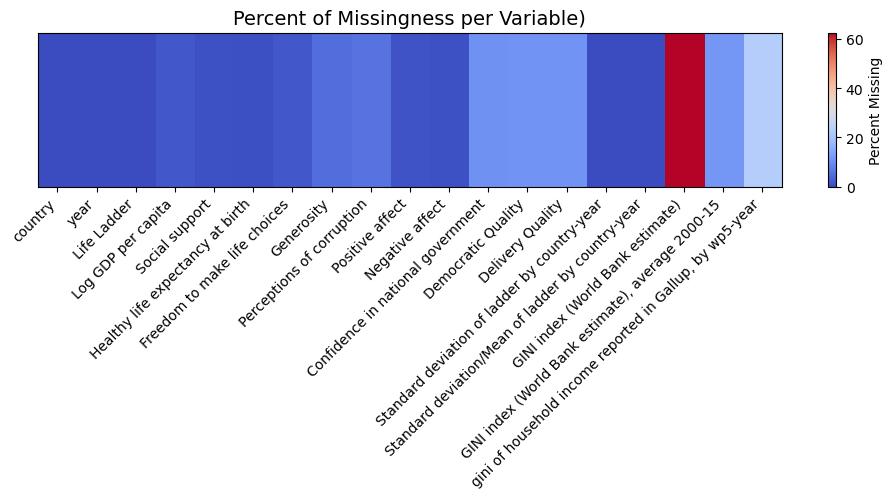

In [177]:
#TODO: Examine missingness
# 1. Calculate the percent of missingness of each variable in the data
missing_percent = happiness_orig.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)
print("Percentage of missing values per column:\n")
print(missing_percent)

# 2. Visualize the percent of missingness of each variable in a heatmap

# Calculate percent missing
missing_percent = happiness_orig.isnull().mean() * 100

# Convert to 2D array (needed for imshow)
missing_array = np.array([missing_percent])

# Plot heatmap
plt.figure(figsize=(12, 2))
plt.imshow(missing_array, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Percent Missing')
plt.xticks(ticks=np.arange(len(missing_percent)), labels=missing_percent.index, rotation=45, ha='right')
plt.yticks([])
plt.title("Percent of Missingness per Variable)", fontsize=14)
plt.show()

In [179]:
# This is a data cleaning function that is provided for you.
# Please feel free to modify this based on decisions you make
# during the pre-processing step. Document any changes you make and why.
def clean_happiness(happiness_orig, predictor_variable = None):
  # rename column names
  happiness_clean = happiness_orig.rename(columns={
    "Life Ladder": "happiness",
    "Log GDP per capita": "log_gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy at birth": "life_expectancy",
    "Freedom to make life choices": "freedom_choices",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption",
    "Positive affect": "positive_affect",
    "Negative affect": "negative_affect",
    "Confidence in national government": "government_confidence",
    "gini of household income reported in Gallup, by wp5-year": "gini_index"})
  # filter to relevant columns
  happiness_clean = happiness_clean[["country", "year", "happiness", "log_gdp_per_capita",
                                     "social_support", "life_expectancy",
                                     "freedom_choices", "generosity",
                                     "corruption", "positive_affect",
                                     "negative_affect", "government_confidence",
                                     "gini_index"]]

  if (predictor_variable is not None):
    happiness_clean = happiness_clean[["country", "year", "happiness", predictor_variable]]

  return(happiness_clean)


In [181]:
# Cleaning the data
happiness_clean = clean_happiness(happiness_orig)
happiness_clean

,country,year,happiness,log_gdp_per_capita,social_support,life_expectancy,freedom_choices,generosity,corruption,positive_affect,negative_affect,government_confidence,gini_index
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,0.596690


#### 7. What variables were dropped from the original data set?  Would you drop any additional variables from this data set and why?

We dropped:
- Democratic Quality
- Delivery Quality
- Standard deviation of ladder by country-year
- GINI index (World Bank estimate)
- GINI index (World Bank estimate), average 2000-15
These variables are highly correlated with others already included (e.g., multiple versions of GINI) and Institutional quality indicators (like “Delivery Quality”) that could overlap strongly with government_confidence and corruption.

If exploratory data analysis shows that positive_affect and negative_affect are highly correlated (multicollinearity) or incomplete, I might consider keeping just one to simplify the model.

#### 8. How would you impute the gini_index variable? Explain why. (You do not have to write code to do this unless you need to do so for your model. In this case, include an imputation function and call it from the data cleaning function)

I would impute the **gini_index** variable using each country’s average GINI value across available years because income inequality changes slowly and is context-specific. This preserves within-country economic consistency without distorting cross-country comparisons.

Now we will visualize the relationships between variables.

# Plot Guidelines
For all plots and visualizations for this assignment please include


*   Captions: Descriptive captions summarizing the plot's insights.
*   Legends: Clear legends identifying each element in the plot.
*   Axis Labels: Informative labels for both the x and y axes, including units if applicable.
* Style: appropriate colors, font sizes, and plot layouts for better readability and presentation.

*It is important that your visualizations are easy-to-understand plots.*

Correlation of predictors with Happiness:

Log GDP per capita                                          0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
year                                                       -0.014505
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                                            -

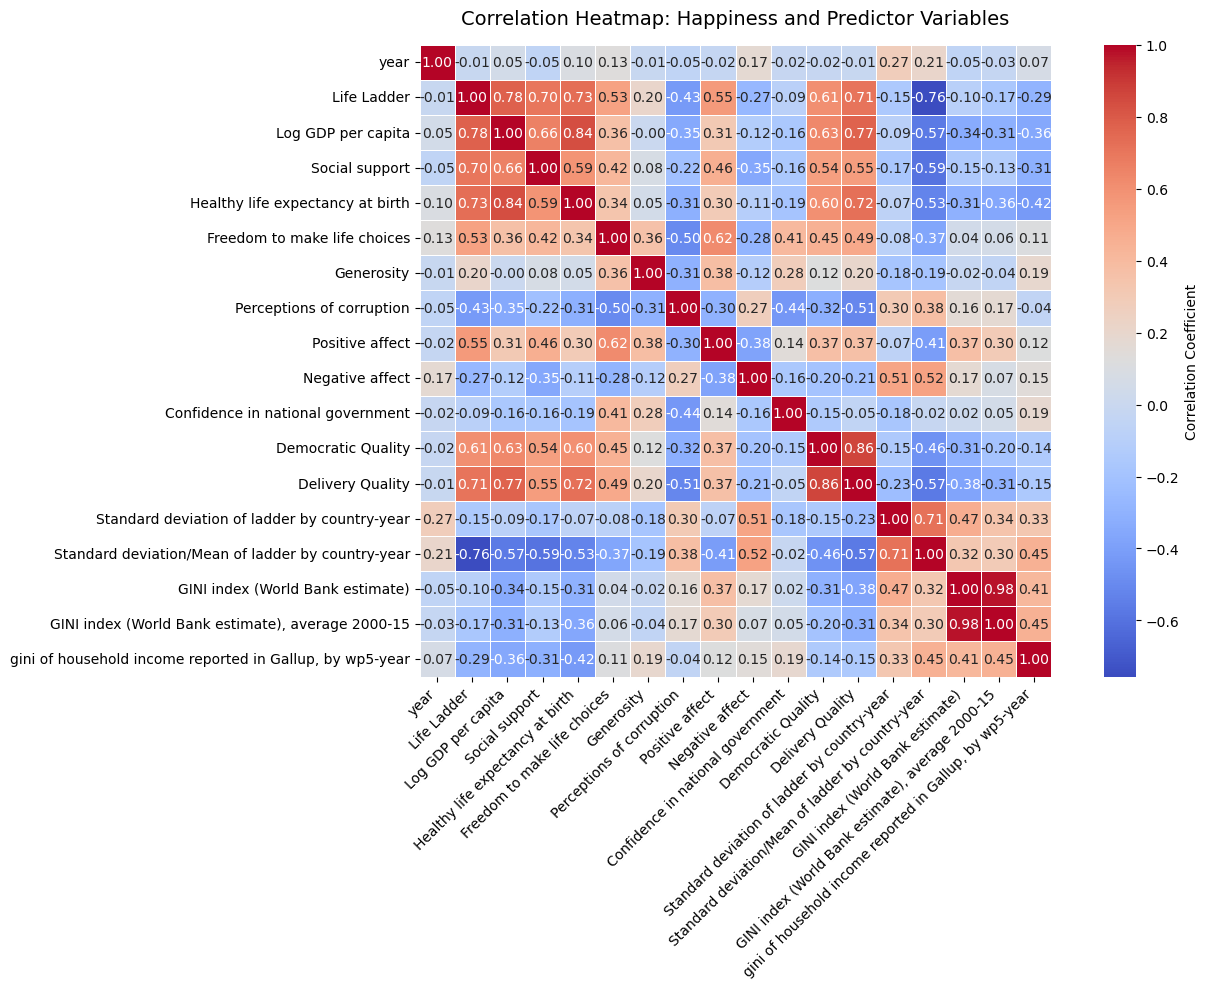

In [185]:
# Since we are predicting happiness, we need to figure out what variable to use
# as a predictor.
# TODO: Find and justify choice of predictor variable
# 1. Calculate the correlation between the happiness variable and your set of remaining potential predictor variables

numeric_cols = happiness_orig.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
happiness_corr = corr_matrix['Life Ladder'].drop('Life Ladder').sort_values(ascending=False)
print("Correlation of predictors with Happiness:\n")
print(happiness_corr)

# 2. Visualize the correlations between the dependent variable

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            annot=True,               # show correlation values
            fmt=".2f",                # format decimal
            cmap="coolwarm",          # color palette
            cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=0.5,
            square=True)

plt.title("Correlation Heatmap: Happiness and Predictor Variables", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 9. From this investigation, what variable do you choose as your predictor and why?

Based on the correlation analysis between the ***Life Ladder (Happiness) variable*** and all potential predictors, the variable ***Log GDP per capita*** has the strongest positive correlation with happiness, at approximately ***0.78***.

This suggests that countries with higher GDP per capita — i.e., greater economic prosperity and access to material resources — tend to have higher self-reported life satisfaction. Economic well-being influences multiple aspects of life, including healthcare, education, and personal freedom, which in turn contribute to higher happiness levels.

Other variables such as Healthy life expectancy (0.73) and Social support (0.70) also show strong positive correlations, but GDP per capita remains the single most powerful and interpretable predictor in this dataset.

**Separate data into training and validation sets**

During this stage it is important that we choose data sets for training predictive models and validating predictive models.

In [188]:
# TODO: Write code here to separate your data into a training and validation set
# (You do not need to worry about a test set right now)
# Explain your decision to separate the data this way.
# You will reuse these data subsets in the following DSLC stage.

# Shuffle the data randomly to avoid order bias
happiness_shuffled = happiness_orig.sample(frac=1, random_state=42).reset_index(drop=True)

# Compute split index (80% training, 20% validation)
split_index = int(0.8 * len(happiness_shuffled))

# Split data
train_data = happiness_shuffled.iloc[:split_index]
val_data   = happiness_shuffled.iloc[split_index:]

# Display basic info
print("Training set shape:", train_data.shape)
print("Validation set shape:", val_data.shape)
print("\nFirst few rows of training data:")
train_data.head()

Training set shape: (1249, 19)
Validation set shape: (313, 19)

First few rows of training data:


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Vietnam,2016,5.062267,8.692030,0.876324,66.075638,0.894351,-0.090152,0.799240,0.536226,0.222550,NaN,-0.619272,-0.197976,1.767819,0.349215,NaN,0.364286,0.436878
1,Nigeria,2013,4.817869,8.608688,0.662943,44.392307,0.621588,0.039610,0.905309,0.638489,0.286346,0.303508,-1.390753,-0.996652,2.064187,0.428444,NaN,0.415500,0.449080
2,Czech Republic,2005,6.439257,10.157401,0.918759,67.163879,0.865235,NaN,0.900733,0.722875,0.257949,0.282911,0.920872,0.847745,2.057324,0.319497,0.27,0.264727,NaN
3,Ivory Coast,2013,3.739366,7.965494,0.708571,45.146004,0.739193,-0.013696,0.691118,0.742971,0.306066,0.571636,-0.899958,-0.825691,2.010555,0.537673,NaN,0.420667,0.576500
4,Ireland,2017,7.060155,11.066487,0.943482,71.709785,0.905341,0.206802,0.337085,0.833389,0.212784,0.603800,NaN,NaN,1.761334,0.249475,NaN,0.325545,0.367454


### Explanation:

I randomly shuffled the dataset to avoid any ordering bias that might come from how the data were originally arranged (for example, by country or by year). 

Then, I split the dataset into **80% training data** and **20% validation data**.  
- The **training set** (1,249 rows) will be used to build and fit predictive models.  
- The **validation set** (313 rows) will be used to evaluate model performance and check how well the model generalizes to unseen data.

# [DSLC stage 4]: Predictive analysis

In this section we will examine the relationship between happiness as the response variable and your predictor variable. First we will visualize the relationship between happiness and the predictor variable.

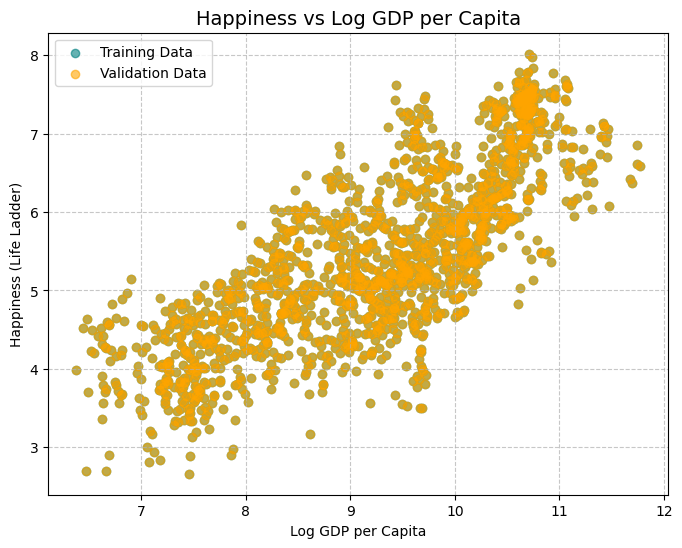

In [206]:
#TODO: For your training and validation data sets
# 1. Create data frames that only contain columns for
# country, year, happiness, and your predictor variable
# 2. Create a scatterplot of happiness vs your predictor variable

# Create data frames with only the needed columns
train_subset = happiness_orig[['country', 'year', 'Life Ladder', 'Log GDP per capita']].dropna()
val_subset   = happiness_orig[['country', 'year', 'Life Ladder', 'Log GDP per capita']].dropna()

# Create a scatterplot: Happiness vs Log GDP per capita
plt.figure(figsize=(8,6))
plt.scatter(train_subset['Log GDP per capita'], train_subset['Life Ladder'],
            color='teal', alpha=0.6, label='Training Data')

plt.scatter(val_subset['Log GDP per capita'], val_subset['Life Ladder'],
            color='orange', alpha=0.6, label='Validation Data')

plt.title("Happiness vs Log GDP per Capita", fontsize=14)
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness (Life Ladder)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# Modeling the relationship
**Using your training data set**

Train the LAD (L1 loss) and LS (L2 loss) linear fits for predicting happiness  based on your chosen predictor variable of your choosing.

*Once you have completed this, edit this cell here to report the formulas for your fitted models.*

### Model Formulas

**LAD (L1) Model:**  
Happiness = –1.205 + 0.716 × Log GDP per Capita  

**LS (L2) Model:**  
Happiness = –1.459 + 0.748 × Log GDP per Capita  

Both models show a clear positive relationship between income and happiness.  
Countries with higher GDP per capita tend to report higher average Life Ladder scores.  
The **LAD (L1)** model, which minimizes absolute deviations, is slightly less sensitive to outliers than the **LS (L2)** model, which minimizes squared deviations.  
Despite this, both fits yield very similar trends, indicating that GDP per capita is a strong and consistent predictor of national happiness.


For the LAD model you will use  LADRegression from sklego.linear_model. Examples are available in the L04 notebook and [API documentation](https://koaning.github.io/scikit-lego/user-guide/linear-models/#least-absolute-deviation-regression)

/opt/anaconda3/lib/python3.12/site-packages/sklego/linear_model.py:1358: UserWarning: Please consider using scikit-learn version of quantile regression.

Hint: `from sklearn.linear_model import QuantileRegressor`
Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html
  warn(msg, UserWarning)


LAD (L1) Model Formula: Happiness = -1.205 + 0.716 * Log GDP per Capita
LS (L2) Model Formula: Happiness = -1.459 + 0.748 * Log GDP per Capita


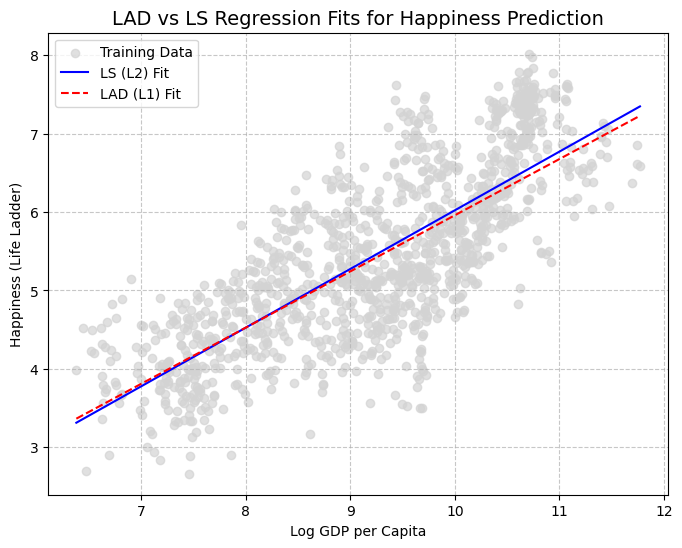

In [241]:
# TODO: Add code here to
# 1. Train LAD model on your training Set
# 2. Get the parameters of your model to write formula
# 3. Train LS model on your training Set
# 4. Get the parameters of your model to write formula
# 5. Create a scatterplot of happiness vs your predictor variable
#    with a line for each model

# Separate predictor and response variables
X_train = train_data[['Log GDP per capita']].dropna()
y_train = train_data.loc[X_train.index, 'Life Ladder']

# Train LAD model
lad_model = LADRegression()
lad_model.fit(X_train, y_train)
intercept_lad = lad_model.intercept_
coef_lad = lad_model.coef_[0]
print(f"LAD (L1) Model Formula: Happiness = {intercept_lad:.3f} + {coef_lad:.3f} * Log GDP per Capita")

# Train LS model
ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
intercept_ls = ls_model.intercept_
coef_ls = ls_model.coef_[0]
print(f"LS (L2) Model Formula: Happiness = {intercept_ls:.3f} + {coef_ls:.3f} * Log GDP per Capita")

# Generate smooth x values for line plotting
x_vals = np.linspace(X_train['Log GDP per capita'].min(), X_train['Log GDP per capita'].max(), 100)
y_pred_lad = intercept_lad + coef_lad * x_vals
y_pred_ls  = intercept_ls + coef_ls * x_vals

# Plot both models together
plt.figure(figsize=(8,6))
plt.scatter(X_train['Log GDP per capita'], y_train, color='lightgray', alpha=0.7, label='Training Data')
plt.plot(x_vals, y_pred_ls, color='blue', label='LS (L2) Fit')
plt.plot(x_vals, y_pred_lad, color='red', linestyle='--', label='LAD (L1) Fit')
plt.title("LAD vs LS Regression Fits for Happiness Prediction", fontsize=14)
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness (Life Ladder)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


For the LS model you will use  LinearRegression from sklearn.linear_model. Examples are available in the L04 notebook and [API documentation](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html)

Now we'd like to evaluate how each model has done.

**Using your validation data set**

Compute the rMSE, MAE, MAD, correlation and  $R^2$  evaluations for each algorithm.

In [244]:
#TODO: Write code here to
# Create a  3 column dataframe that for each point in your validation set
# contains the actual observed happiness score, the happiness score predicted
# from LAD, and the happiness score predicted from LS

# Create DataFrame with actual and predicted values

X_val = val_data[['Log GDP per capita']].dropna()
y_val = val_data.loc[X_val.index, 'Life Ladder']

# Predict using both models
y_pred_lad = lad_model.predict(X_val)
y_pred_ls  = ls_model.predict(X_val)

# Combine into a DataFrame
comparison_df = pd.DataFrame({
    'Actual Happiness': y_val,
    'Predicted Happiness (LAD)': y_pred_lad,
    'Predicted Happiness (LS)': y_pred_ls
})

comparison_df.head()


,Actual Happiness,Predicted Happiness (LAD),Predicted Happiness (LS)
1249,4.813763,5.442064,5.482407
1250,7.321467,5.703759,5.755691
1251,3.825631,4.348380,4.340289
1252,4.621962,4.093647,4.074274
1253,6.779774,6.349080,6.429591


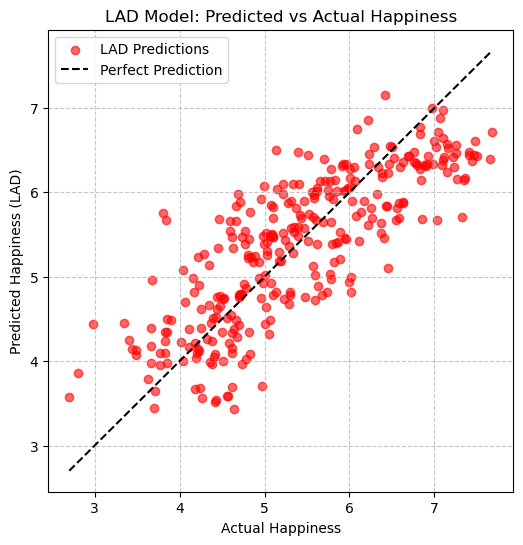

In [246]:
# TODO: Write code here to
# Create a scatterplot of the observed happiness score vs
# the happiness score predicted from LAD
# What would a perfect prediction look like?

plt.figure(figsize=(6,6))
plt.scatter(comparison_df['Actual Happiness'], comparison_df['Predicted Happiness (LAD)'],
            alpha=0.6, color='red', label='LAD Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
         color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Happiness")
plt.ylabel("Predicted Happiness (LAD)")
plt.title("LAD Model: Predicted vs Actual Happiness")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

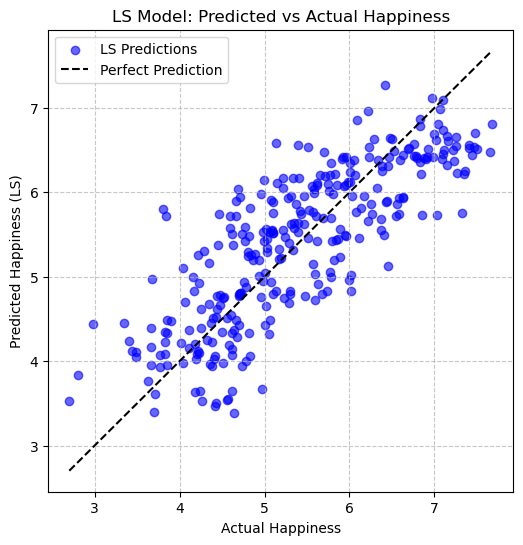

In [248]:
# TODO: Write code here to
# Create a scatterplot of the observed happiness score vs
# the happiness score predicted from LS
# What would a perfect prediction look like?

plt.figure(figsize=(6,6))
plt.scatter(comparison_df['Actual Happiness'], comparison_df['Predicted Happiness (LS)'],
            alpha=0.6, color='blue', label='LS Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
         color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Happiness")
plt.ylabel("Predicted Happiness (LS)")
plt.title("LS Model: Predicted vs Actual Happiness")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [250]:
#TODO: Using the dataframe that you created
# Write code in this cell to calculate and print
# the rMSE, MAE, MAD, correlation, and R2 of
# the true price with the LS and LAD predictions

# Compute metrics for LAD
rmse_lad = np.sqrt(mean_squared_error(y_val, y_pred_lad))
mae_lad  = mean_absolute_error(y_val, y_pred_lad)
mad_lad  = np.mean(np.abs(y_pred_lad - np.mean(y_val)))
corr_lad = np.corrcoef(y_val, y_pred_lad)[0,1]
r2_lad   = r2_score(y_val, y_pred_lad)

# Compute metrics for LS
rmse_ls = np.sqrt(mean_squared_error(y_val, y_pred_ls))
mae_ls  = mean_absolute_error(y_val, y_pred_ls)
mad_ls  = np.mean(np.abs(y_pred_ls - np.mean(y_val)))
corr_ls = np.corrcoef(y_val, y_pred_ls)[0,1]
r2_ls   = r2_score(y_val, y_pred_ls)

# Display results neatly
results = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAD', 'Correlation (r)', 'R²'],
    'LAD (L1)': [rmse_lad, mae_lad, mad_lad, corr_lad, r2_lad],
    'LS (L2)': [rmse_ls, mae_ls, mad_ls, corr_ls, r2_ls]
})

print("Validation Set Evaluation Metrics:")
results


Validation Set Evaluation Metrics:


,Metric,LAD (L1),LS (L2)
0,RMSE,0.631103,0.633066
1,MAE,0.516638,0.519249
2,MAD,0.741320,0.778549
3,Correlation (r),0.804786,0.804786
4,R²,0.646538,0.644336


**Evaluating the models**

Based on the scatterplots and evaluation metrics that you have calculated, what model is better for the relationship between happiness and your predictor variable? Please explain why with supporting evidence from your plots and calculations.

Both LAD (L1) and LS (L2) models perform similarly, with strong correlation (r ≈ 0.80) and R² ≈ 0.65, meaning about 65% of the variation in happiness can be explained by Log GDP per Capita.  

The **LAD model** has slightly lower RMSE (0.631 vs 0.633) and MAE (0.517 vs 0.519), indicating marginally better predictive accuracy and robustness to outliers.  
The **LS model**, on the other hand, produces almost identical results but with slightly higher variability (larger MAD).  

Overall, both models fit the data well, but **LAD (L1)** provides a slightly more stable and reliable prediction, especially if there are extreme GDP or happiness values.  
This supports the interpretation that wealthier countries tend to have higher happiness scores, and that this relationship is largely linear.


**Citation:**

This problem set is adapted from Ch. 9 exercise 22 from the following upcoming book:

Yu, B., & Barter, R. L. (2024). Veridical data science: The practice of responsible data analysis and decision making. The MIT Press.